LSTM
==

In [7]:
import pandas as pd
import torch

from data_processing import DataGenerator
from model import GenderLSTM
from model_evaluation import baseline_accuracy, compare_accuracies, statistical_check
from visualization import plot_metrics

### Dataset

In [20]:
filename= '../data/nlexique.csv'
df = pd.read_csv(filename)
df = df[['lexeme', 'sg', 'gen']].rename(columns={'lexeme': 'orthography', 'sg': 'phonetic transcription', 'gen': 'gender'}).dropna().reset_index(drop=True)
df

,orthography,phonetic transcription,gender
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [24]:
# Datasets with the 'b class
orthography_data_3gen = df[['orthography', 'gender']]
phonetic_data_3gen = df[['phonetic transcription', 'gender']]

In [30]:
# Datasets without the 'b' class
orthography_data_2gen = df[df['gender'] != 'b'][['orthography', 'gender']]
phonetic_data_2gen = df[df['gender'] != 'b'][['phonetic transcription', 'gender']]

### Hyperparameters


In [11]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embedding_dim = 128
hidden_size = 256
batch_size = 64
n_epochs = 20
lr = 0.001

### Orthographic Form (3 classes)

In [13]:
or3_data_generator = DataGenerator(orthography_data_3gen, reverse_nouns=True)
or3_model = GenderLSTM(or3_data_generator, embedding_dim, hidden_size, device=DEVICE, reversed=True)
or3_train, or3_valid = or3_model.train_model(or3_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/orthography_3gen.pth')

Epoch: 0
[Train] Loss: 0.4428   Accuracy: 83.75%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 68.81%
[Valid] Loss: 0.3988   Accuracy: 85.67%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 69.74%
----------------------------------------------------------------------------------------------------
Epoch: 1
[Train] Loss: 0.3452   Accuracy: 87.34%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 75.27%
[Valid] Loss: 0.3769   Accuracy: 86.92%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 76.84%
----------------------------------------------------------------------------------------------------
Epoch: 2
[Train] Loss: 0.3164   Accuracy: 88.24%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 75.04%
[Valid] Loss: 0.3994   Accuracy: 86.90%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 77.66%
---------------------------------------------

In [14]:
or3_predictions = or3_model.predict(or3_data_generator, batch_size)
or3_predictions_df = pd.DataFrame(or3_predictions)
or3_predictions_df

,Word,Predicted Gender,True Gender
0,n,m,m
1,a,m,m
2,w,m,m
3,c,m,m
4,ap,m,f
...,...,...,...
6196,noitasinorhcnystsop,f,f
6197,stnedicca-ecnarussa,m,f
6198,uaenîart-ruetaripsa,m,m
6199,ruelliartim-telotsip,b,m


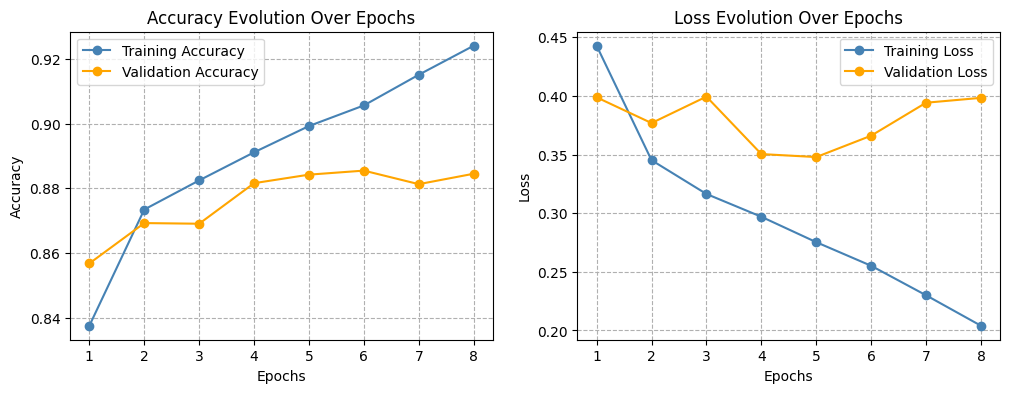

In [16]:
plot_metrics(or3_train['accuracy'], or3_valid['accuracy'], or3_train['loss'], or3_valid['loss'])

The most frequent label in the dataset is: m


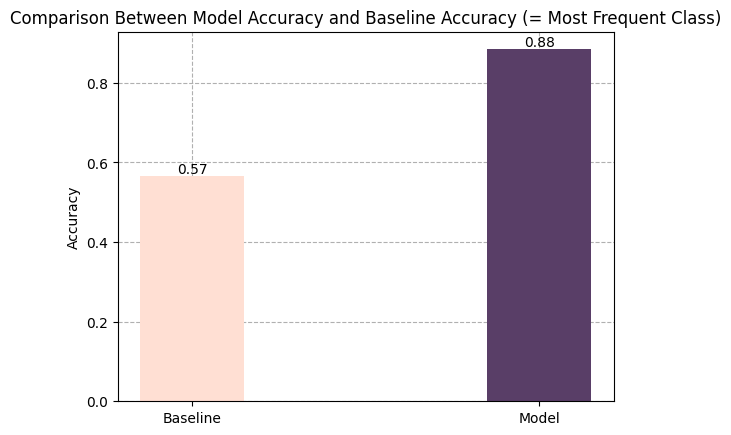

In [15]:
baseline_acc = baseline_accuracy(or3_data_generator, verbose=True)

compare_accuracies(baseline_acc, or3_valid['accuracy'][-1])

In [69]:
hyperparameters = {'embed_dim': 128,
                   'hidden_size': 256,
                   'batch_size': 64,
                   'n_epochs': 20,
                   'lr': 0.001}

# Averaging results over 10 runs
or3_t, or3_v = statistical_check(orthography_data_3gen, hyperparameters, runs=10, reverse_nouns=True, df=True, device=DEVICE)

Avg Train Loss: 0.1348   Avg Train Accuracy: 95.23%   Avg Plateau Beginning (index): 0   Avg Plateau Beginning Accuracy: 75.60%
Avg Valid Loss: 0.4465   Avg Valid Accuracy: 88.31%   Avg Plateau Beginning (index): 0   Avg Plateau Beginning Accuracy: 78.86%


### Phonetic Form (3 classes)

In [ ]:
ph3_data_generator = DataGenerator(phonetic_data_3gen, reverse_nouns=True, df=True)
ph3_model = GenderLSTM(ph3_data_generator, embedding_dim, hidden_size, device=DEVICE)
ph3_train, ph3_valid = ph3_model.train_model(ph3_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/phonetic_3gen.pth')

In [ ]:
ph3_predictions = ph3_model.predict(ph3_data_generator, batch_size)
ph3_predictions_df = pd.DataFrame(ph3_predictions)
ph3_predictions_df

In [ ]:
plot_metrics(ph3_train['accuracy'], ph3_valid['accuracy'], ph3_train['loss'], ph3_valid['loss'])

In [ ]:
baseline_acc = baseline_accuracy(ph3_data_generator, verbose=True)

compare_accuracies(baseline_acc, ph3_valid['accuracy'][-1])

In [ ]:
# Averaging results over 10 runs
ph3_t, ph3_v = statistical_check(phonetic_data_3gen, hyperparameters, runs=10, device=DEVICE)

In [ ]:
word_9 = phonetic_data_3gen['phonetic trasncription'][450] # 'affiliée'

print(f'word: {word_9}')
view_plateau(word_9, '../saved_models/phonetic_3gen.pth', reverse=True)

In [ ]:
save_probabilities('../saved_models/phonetic_3gen.pth', '../results/phonetic_3gen.csv')

### Orthographic Form (binary)

In [ ]:
or2_data_generator = DataGenerator(orthography_data_2gen, reverse_nouns=True, df=True)
or2_model = GenderLSTM(or2_data_generator, embedding_dim, hidden_size, device=DEVICE)
or2_train, or2_valid = or2_model.train_model(or2_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/orthography_2gen.pth')

In [ ]:
or2_predictions = or2_model.predict(or2_data_generator, batch_size)
or2_predictions_df = pd.DataFrame(or2_predictions)
or2_predictions_df

In [ ]:
plot_metrics(or2_train['accuracy'], or2_valid['accuracy'], or2_train['loss'], or2_valid['loss'])

In [ ]:
baseline_acc = baseline_accuracy(or2_data_generator, verbose=True)

compare_accuracies(baseline_acc, or2_valid['accuracy'][-1])

In [ ]:
# Averaging results over 10 runs
or2_t, or2_v = statistical_check(orthography_data_2gen, hyperparameters, runs=10, device=DEVICE)

### Phonetic Form (binary)

In [ ]:
ph2_data_generator = DataGenerator(phonetic_data_2gen, reverse_nouns=True, df=True)
ph2_model = GenderLSTM(ph2_data_generator, embedding_dim, hidden_size, device=DEVICE)
ph2_train, ph2_valid = ph2_model.train_model(ph2_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/phonetic_2gen.pth')

In [ ]:
ph2_predictions = ph2_model.predict(ph2_data_generator, batch_size)
ph2_predictions_df = pd.DataFrame(ph2_predictions)
ph2_predictions_df

In [ ]:
plot_metrics(ph2_train['accuracy'], ph2_valid['accuracy'], ph2_train['loss'], ph2_valid['loss'])

In [ ]:
baseline_acc = baseline_accuracy(ph2_data_generator, verbose=True)

compare_accuracies(baseline_acc, ph2_valid['accuracy'][-1])

In [ ]:
# Averaging results over 10 runs
ph2_t, ph2_v = statistical_check(phonetic_data_2gen, hyperparameters, runs=10, device=DEVICE)

In [169]:
data = {'Orthographic Form (M/F/B)': [f"{(or3_t['avg_accuracy'].item() * 100):.2f}%", f"{(or3_v['avg_accuracy'].item() * 100):.2f}%"],
        'Phonetic Form (M/F/B)': [f"{(ph3_t['avg_accuracy'].item() * 100):.2f}%", f"{(ph3_v['avg_accuracy'].item() * 100):.2f}%"],
        'Orthographic Form (M/F)': [f"{(or2_t['avg_accuracy'].item() * 100):.2f}%", f"{(or2_v['avg_accuracy'].item() * 100):.2f}%"], 
        'Phonetic Form (M/F)': [f"{(ph2_t['avg_accuracy'].item() * 100):.2f}%", f"{(ph2_v['avg_accuracy'].item() * 100):.2f}%"]}

accuracy_results = pd.DataFrame(data).rename(index={0:'Training Accuracy', 1: 'Validation Accuracy'})
accuracy_results

,Orthographic Form (M/F/B),Phonetic Form (M/F/B),Orthographic Form (M/F),Phonetic Form (M/F)
Training Accuracy,94.76%,88.09%,97.69%,91.45%
Validation Accuracy,88.06%,81.26%,91.07%,83.16%


In [170]:
or3_t

{'avg_accuracy': tensor(0.9476),
 'avg_loss': 0.14588457543511527,
 'avg_plateau_beg': 6,
 'avg_acc_at_plateau_beg': tensor(0.8656)}

In [173]:
plateau_data = {'Orthographic Form': [or3_t['avg_plateau_beg'], or3_v['avg_plateau_beg']],
                'Phonetic Form': [ph3_t['avg_plateau_beg'], ph3_v['avg_plateau_beg']],
                }

plateau_results = pd.DataFrame(plateau_data).rename(index={0:'Training Set', 1: 'Validation Set'})
plateau_results

,Orthographic Form,Phonetic Form
Training Set,6,5
Validation Set,6,4
